---
title: Lasers and Fabry Perots - Homework 02
date: 2025-02-16
authors:
  - name: Alex Correia
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": True,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

This is the second homework assignment for *Lasers and Optomechanics* at Syracuse University.

**It is due Monday, February 16, 2026**

**<span style="color:#ff5555;">You will need to complete the questions in this jupyter notebook and submit it via `gitlab`</span>**


## <span style="color:#ff9900">Readings</span>

Chapter 1 of *Lasers* by Seigman: [Free eBook](https://opg-optica-org.libezproxy2.syr.edu/content/bookshelf/book/item/lasers)

# Atomic Rate Equations

Problem 1 from Chapter 1.5 of *Lasers* by Siegman

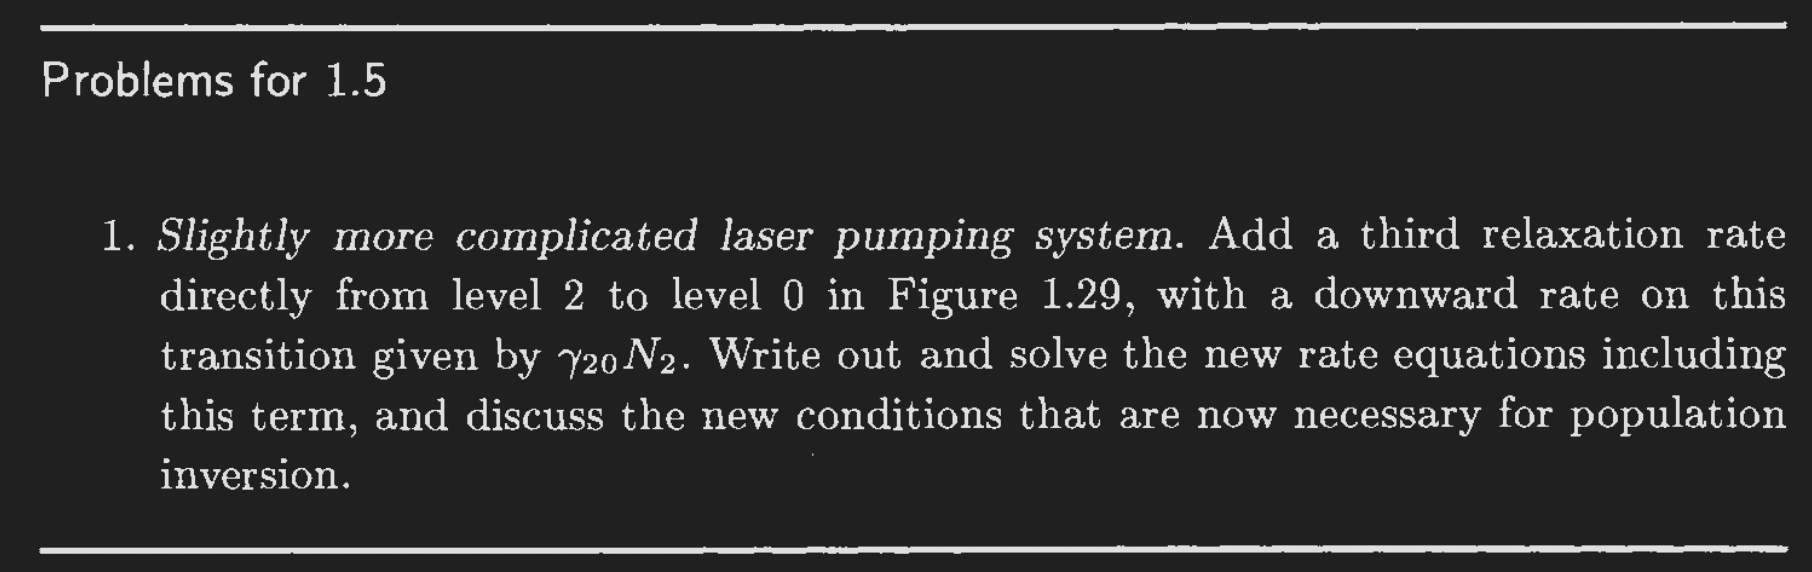

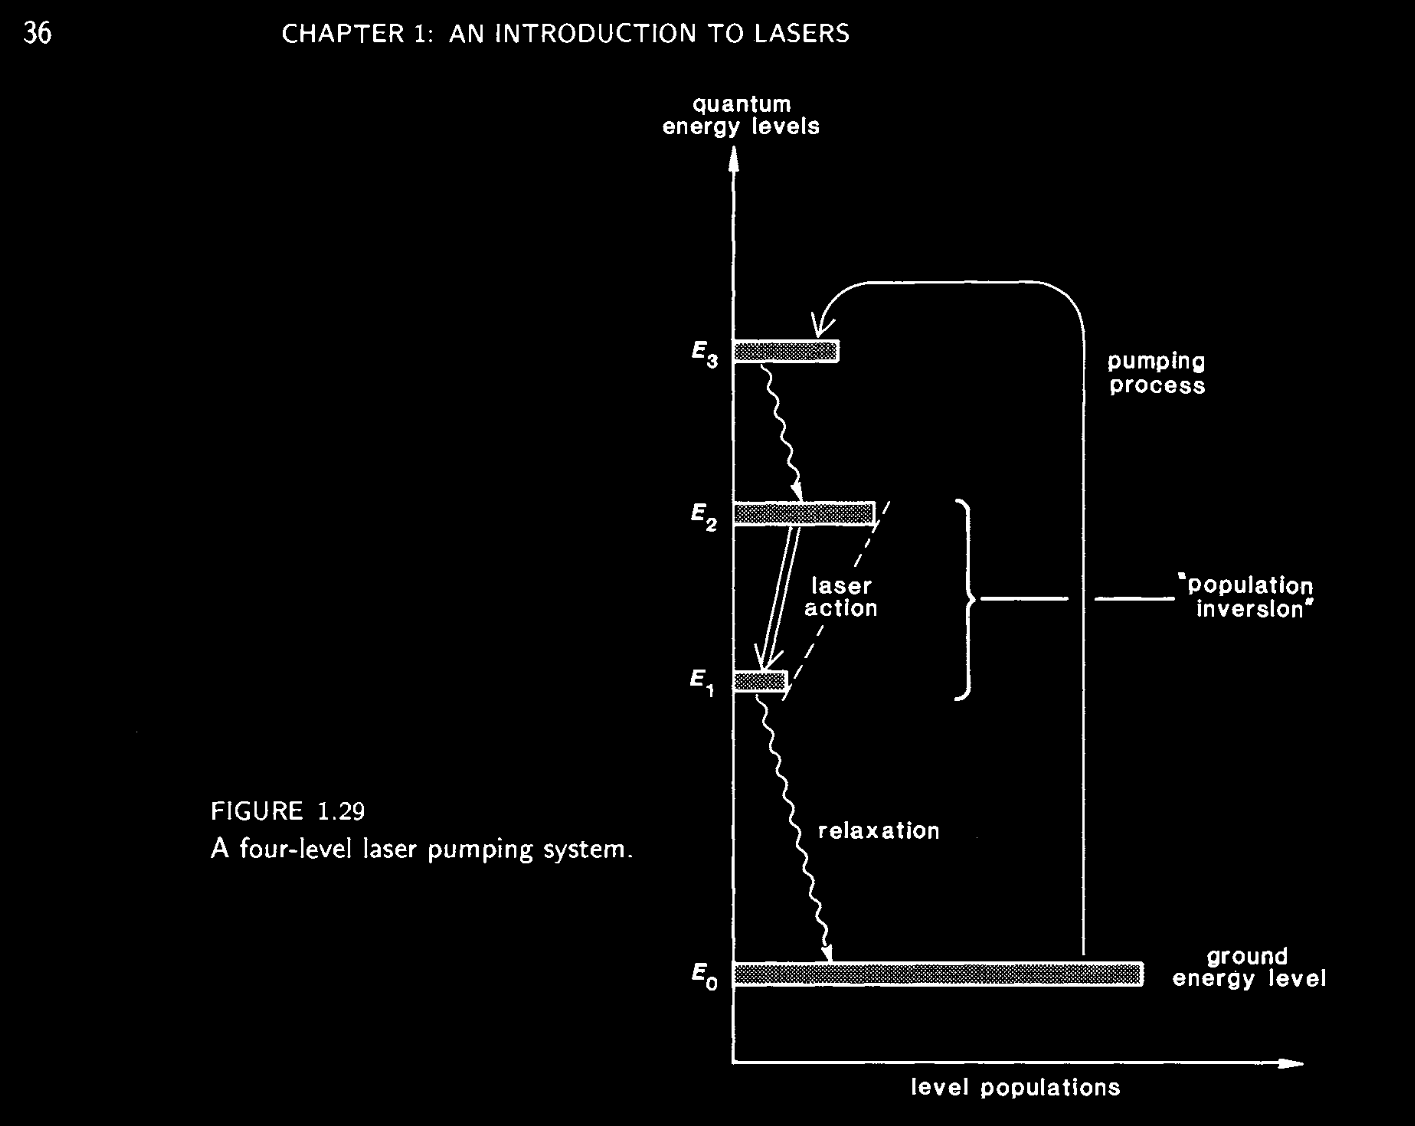

The four-level system is shown below, with the new relaxation $E_2 \rightarrow E_0$ highlighted in red. 

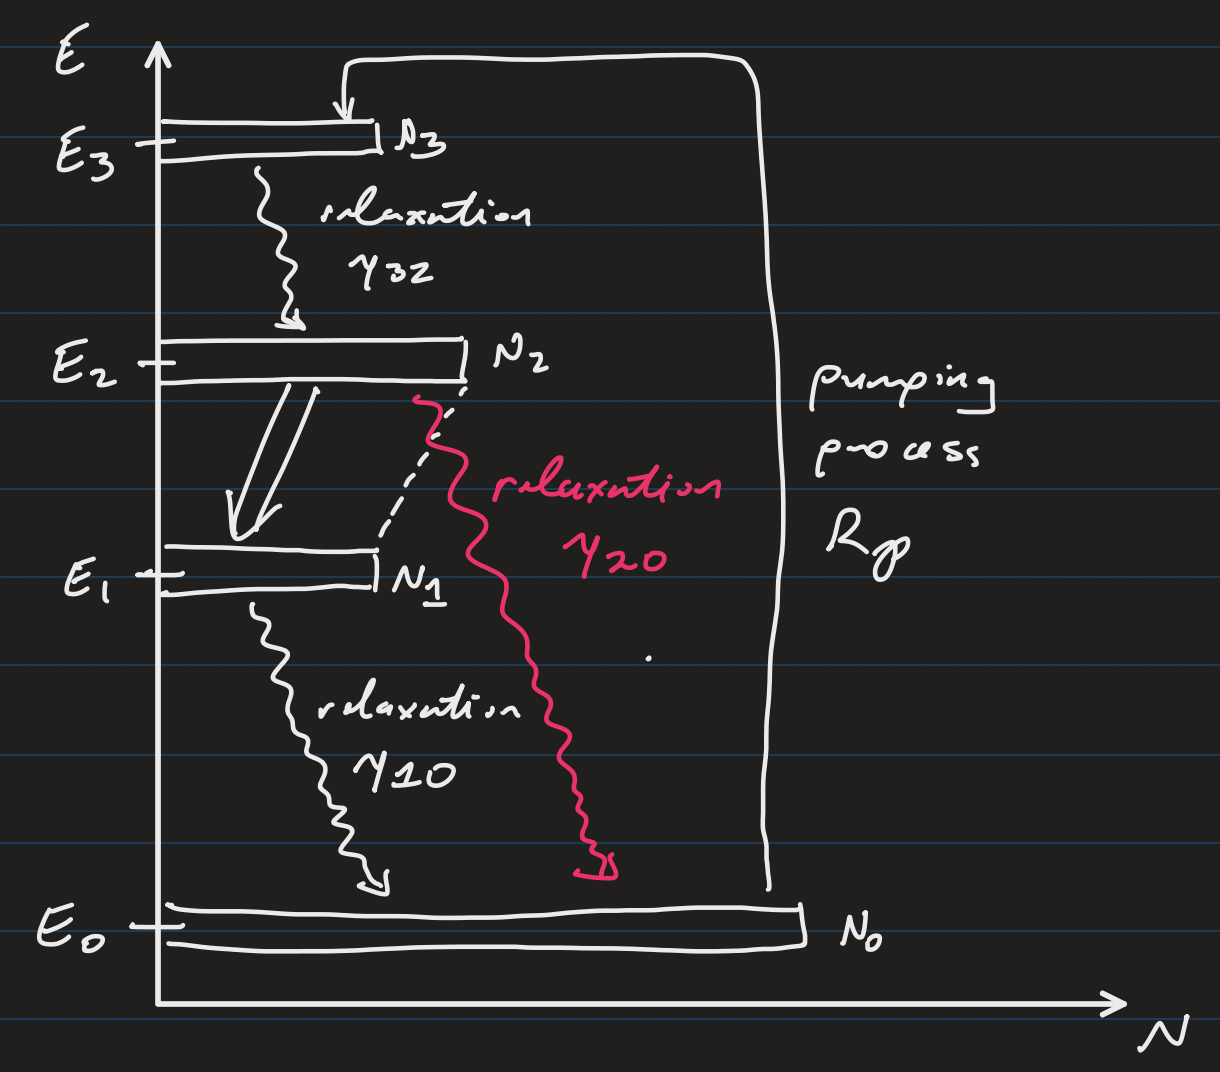

In the new system, the rate of atoms entering $E_3$ is determined by a constant pumping rate $R_p$, which transfers atoms from $E_0$ to $E_3$. The amount leaving this state is determined by the relaxation rate $\gamma_{32}$:
```{math}
:label: dn3
\frac{dN_3}{dt} = R_p(N_0 - N_3) - \gamma_{32}N_3(t).
```
The number of atoms entering state $E_2$ is determined entirely by the decay process $E_3 \rightarrow E_2$. The amount leaving this state is determined by both the laser action determined by the decay rate $\gamma_{21}$, as well as the relaxation determined by the decay rate $\gamma_{20}$:
```{math}
:label: dn2
\frac{dN_2}{dt} = \gamma_{32}N_3(t) - \gamma_{21}N_2(t) - \gamma_{20}N_2(t).
```
The rate of atoms entering and leaving $N_1$ is unchanged, with $\gamma_{21}N_2$ describing the laser action $E_2 \rightarrow E_1$ and $\gamma_{10}N_1$ describing the relaxation to the ground state $E_1 \rightarrow E_0$:
```{math}
:label: dn1
\frac{dN_1}{dt} = \gamma_{21}N_2(t) - \gamma_{10}N_1(t).
```
Finally, the number of ground state atoms is determined by the relaxations $E_2 \rightarrow E_0$ and $E_1 \rightarrow E_0$, as well as the pumping $R_p$:
```{math}
:label: dn0
\frac{dN_0}{dt} = \gamma_{20}N_2(t) + \gamma_{10}N_1(t) - R_p(N_0 - N_3).
```
This is a highly nonlinear system of differential equations that can be simplified if we assume the system is in a steady state, $d/dt \rightarrow 0$. This reduces the system down to
\begin{align}
R_pN_0 &= (\gamma_{32} + R_p)N_3 \\
\gamma_{32}N_3 &= N_2(\gamma_{21} + \gamma_{20}) \\
\gamma_{21}N_2 &= \gamma_{10}N_1 \\
R_pN_0 &= R_pN_3 + \gamma_{20}N_2 + \gamma_{10}N_1. \\
\end{align}
Specifically, we can solve the second equation to obtain $N_2$ in terms of $N_3$:
$$N_2 = \frac{\gamma_{32}N_3}{\gamma_{21} + \gamma_{20}}.$$
Then, solving the third equation gives
$$N_1 = \frac{\gamma_{21}}{\gamma_{10}}N_2.$$
The condition for population inversion can be obtained by taking the difference of these two results:
$$N_2 - N_1 = \frac{\gamma_{32}N_3(\gamma_{10} - \gamma_{21})}{\gamma_{10}(\gamma_{21}+\gamma_{20})}.$$
The condition $N_2 > N_1$ is therefore the same as the simpler case (i.e. without the $2 \rightarrow 0$ decay):
$$\gamma_{10} > \gamma_{21}.$$
Thus, there is no dependence on the new decay rate $\gamma_{20}$ in the condition for population inversion. Intuitively this could make sense; the $2 \rightarrow 0$ decay rate means less atoms are in $E_2$, which also weakens the $2 \rightarrow 1$ transition. As a result, the resulting laser is less powerful than if there were no direct decay to ground (indicated by the larger denominator of $N_2 - N_1$ than in the simpler case).

# Pulsed Laser Power

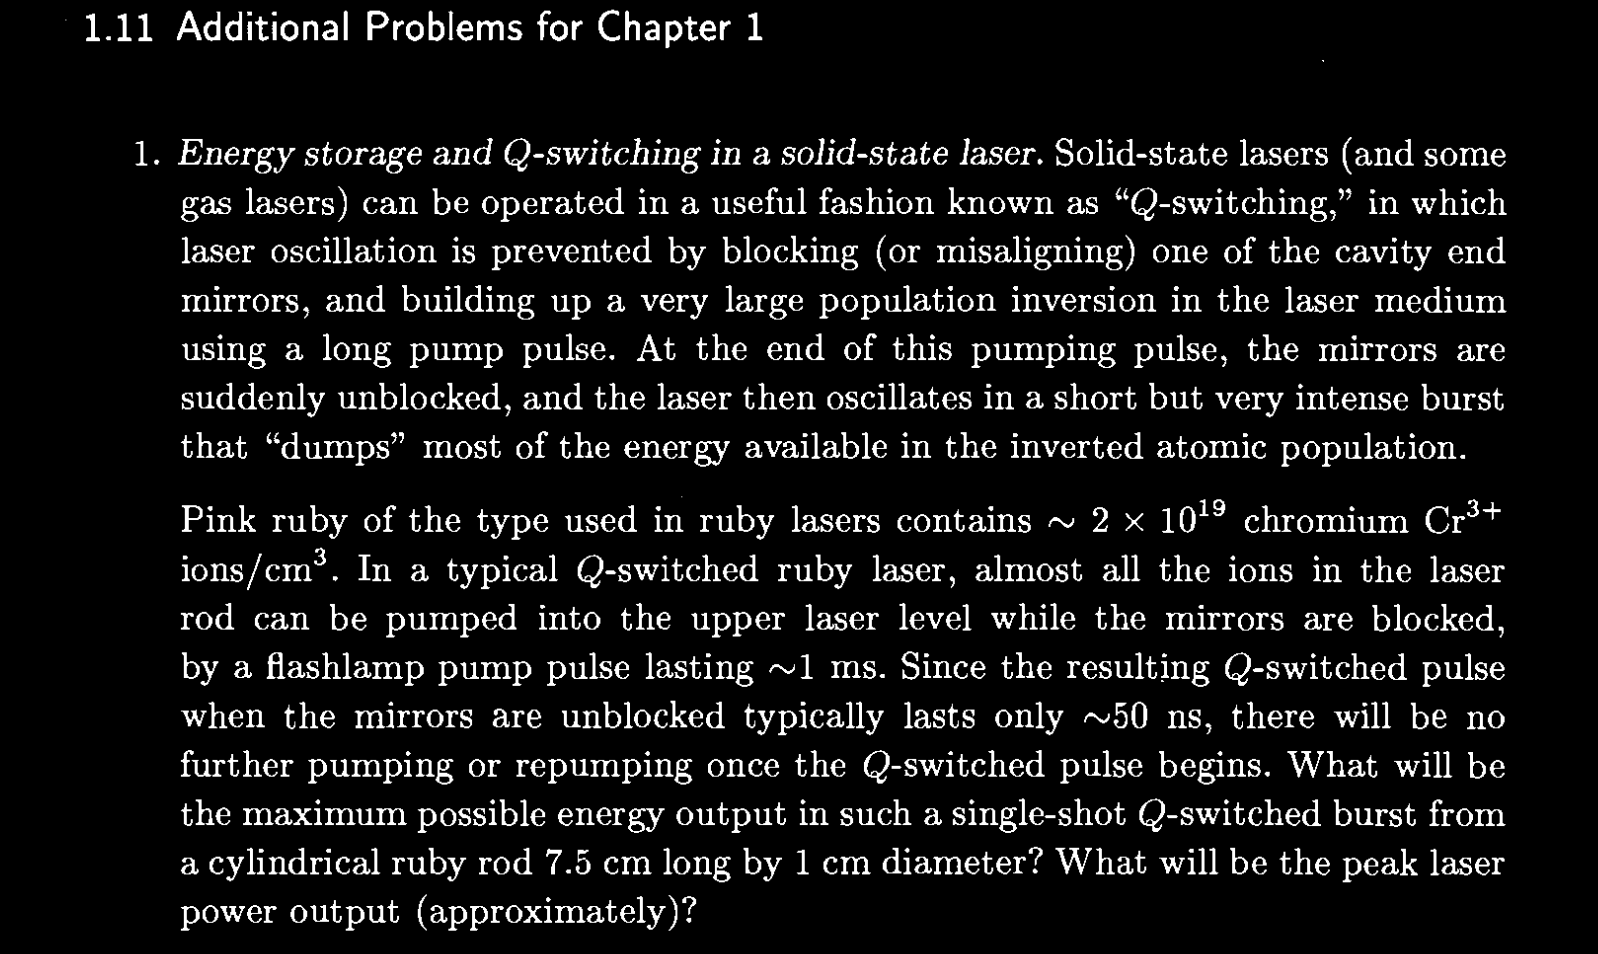

First, we calculate the number of ions $N$ in the chromium sample. The volume of the sample is $\pi r^2\ell$, where $\ell = 7.5~\text{cm}$ and $r = 1/2~\text{cm}$. This then gets multiplied by the number density of ions, $\rho = 2 \times 10^{19}~\text{cm}^{-3}$.

In [47]:
# calculate number of ions
r = 1/2
l = 7.5
vol = np.pi*r*r*l

rho = 2e19
N = vol*rho

print(f'Number of chromium ions: {N:.2e}')

Number of chromium ions: 1.18e+20


To get the maximum energy of the laser, we assume that all of the ions can be excited during pumping. (Realistically, some of the ions will not be excited over the 1 ms pumping period, and some excited ions will spontaneously emit in that period.) From the text, a ruby laser emits light at $\lambda = 694~\text{nm}$. This implies an energy transition per photon of
```{math}
:label: photon_energy
E_{\gamma} = h\nu = \frac{hc}{\lambda},
```
where $h$ is the Planck constant and $c$ is the speed of light. To get the total energy $E$ of the laser, we multiply $E_{\gamma}$ by $N$.

In [48]:
# calculate total energy output
c = 3e8
h = 6.626e-34
lam = 694e-9

E = N*h*c/lam

print(f'Total energy output: {E:.2f} J')

Total energy output: 33.74 J


To estimate the peak power of the laser, we'll approximate each pulse as a square pulse. (Realistically, the power will exponentially decay over the pulse time.) Thus, the peak power is roughly $E/t$, where $t \approx 50~\text{ns}$.

In [49]:
# estimate peak power
t = 50e-9
P = E/t

print(f'Approximate peak power: {P:.2e} W')

Approximate peak power: 6.75e+08 W


## Pulsed Laser Intensity

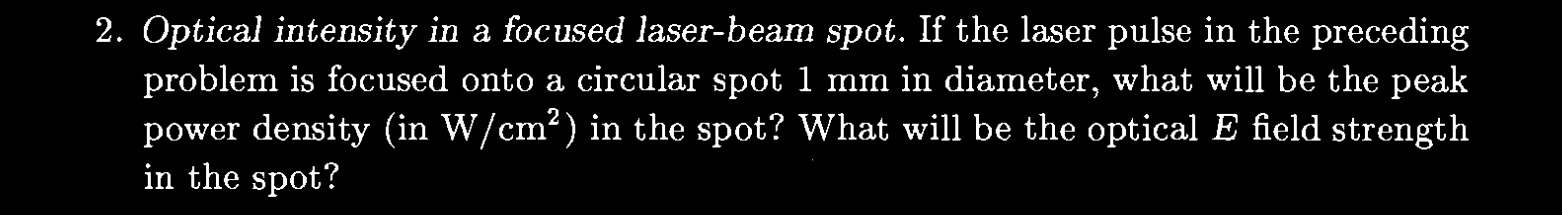

We'll assume that the cross-section of the laser output has a uniform power density. (Realistically, the cross-section will be a radially symmetric Gaussian beam with peak power density at the center.) The peak power density (aka, the intensity) will approximately be the peak power $P \approx 6.75 \times 10^8~\text{W}$ divided by the cross-sectional area of the beam of radius $r = 1/2~\text{mm}=0.05~\text{cm}$.

In [51]:
# calculate power density
r_beam = 0.05
A_beam = np.pi*r_beam*r_beam
P_density = P/A_beam

print(f'Approximate peak power density: {P_density:.2e} W/cm^2')

Approximate peak power density: 8.59e+10 W/cm^2


The strength of the electric field is related to the _total_ power by
```{math}
:label: power_efield
P(t) = |E(t)|^2.
```
To find the peak intensity, we can divide out the area, since we assumed constant intensity across the beam:
```{math}
:label: intensity_efield
I(t) = \frac{|E(t)|^2}{A_{beam}}.
```
However, with the assumptions we made, the intensity is just the total power divided by the beam area. So, we can just solve Eq. {eq}`power_efield` for the field amplitude:
```{math}
:label: efield_power
E \approx \sqrt{P}.
```

In [52]:
field_str = P**0.5

print(f'Approximate peak field strength: {field_str:.2e} √W')

Approximate peak field strength: 2.60e+04 √W


# Geometric Series Fabry-Perot

## Part A: 
Rederive the Fabry-Perot intracavity electric field $E_\mathrm{cav}$ using the fact that the infinite geometric series
\begin{align}
\sum_{n=0}^\infty x^n = 1 + x + x^2 + \cdots x^n + \cdots = \dfrac{1}{1 - x} \qquad \text{iff} |x| < 1
\end{align}

*Hint 1:* Set up some contributing fields $E_n$ for $n$ round-trips.

Take a Fabry-Perot cavity with just an incident field $E_{in}$ (pictured below).

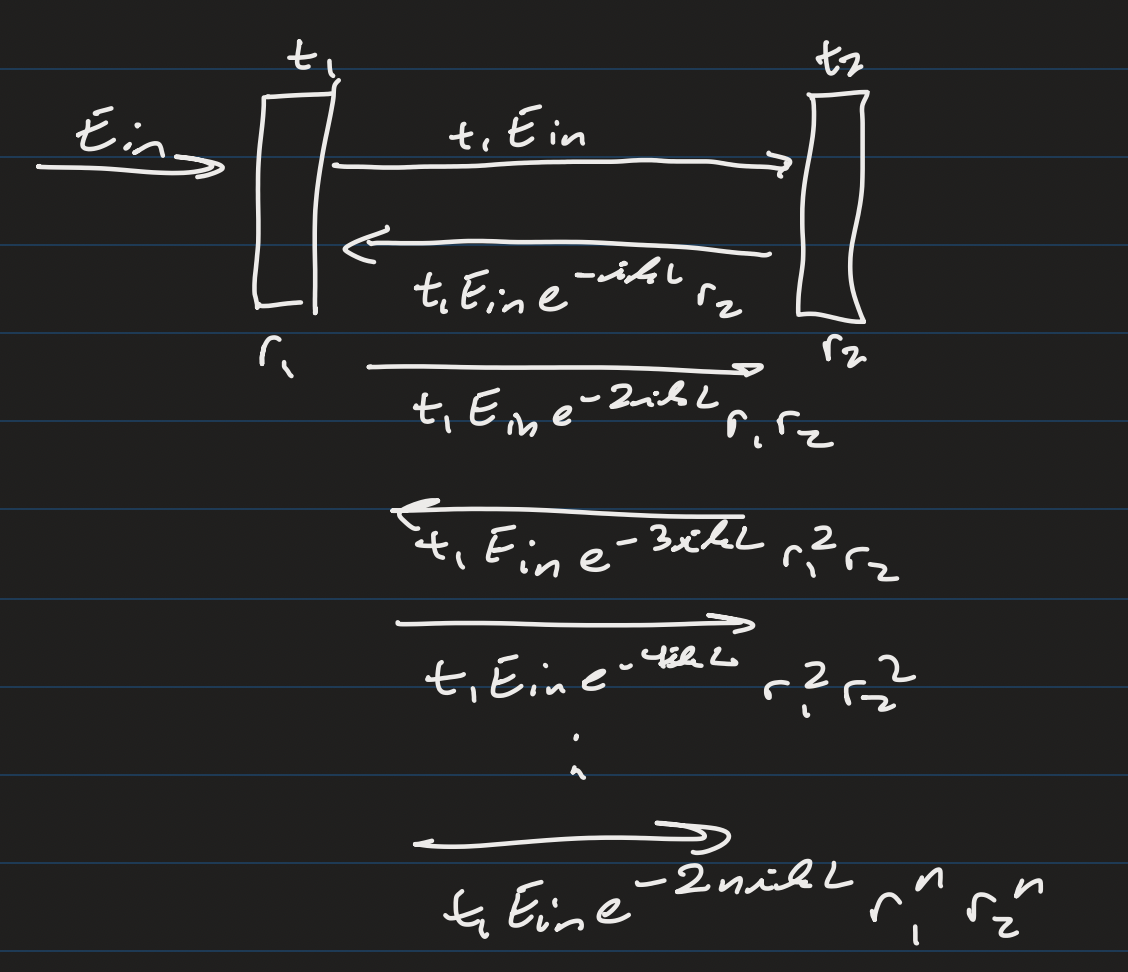

Initially, the field inside the cavity (i.e. with no round trips) is
$$E_{cav,0} = t_1E_{in}.$$
The field will accrue a length transmission factor $exp(-ikL)$ and reflect off of the mirror $r_2$. Then, the field will accrue another $exp(-ikL)$ factor and reflect off the left mirror $r_1$. Thus, after one round trip,
$$E_{cav,1} = t_1E_{in}e^{-2ikL}r_1r_2.$$
After another round trip, the field will pick up two more length factors and another factor each of $r_1$ and $r_2$:
$$E_{cav,2} = t_1E_{in}e^{-4ikL}r_1^2r_2^2.$$
For $N$ round trips, the field will pick up $N$ factors of $r_1$ and $r_2$ and $2N$ length factors:
\begin{align}
E_{cav,N} &= t_1E_{in}e^{-2NikL}r_1^Nr_2^N \\
&= t_1E_{in}(e^{-2ikL}r_1r_2)^N.
\end{align}
Assuming $E_{in}$ is continuous and at large timescales, the cavity will contain all possible reflection states (i.e. just transmitted, one round trip, ..., infinitely reflected). We can therefore write $E_{cav}$ as an infinite sum of reflected states:
$$E_{cav} = \sum_{n=0}^\infty t_1E_{in}(e^{-2ikL}r_1r_2)^n.$$
Notice that the maximum absolute value of the phase factor is 1. Also, while $r_1$ and $r_2$ can theoretically have maximum values of 1, we know that $r_1 < 1$ since $|t_1|^2 = 1 - |r_1|2$ (assuming power conservation) and at least some light must be transmitted. Therefore, the factor raised to the power of $n$ is strictly less than 1, meaning we can apply the geometric series identity above:
$$\sum_{n=0}^\infty t_1E_{in}(e^{-2ikL}r_1r_2)^n = \frac{t_1 E_{in}}{1 - e^{-2ikL}r_1r_2}.$$
Thus, we obtain the same result for the field inside the cavity,
$$E_{cav} = \frac{t_1}{1 - r_1r_2e^{-2ikL}} E_{in}.$$

## Part B:
Draw a plot of the first couple of electric fields $E_n$,
as well as the total phasor $E_\mathrm{cav}$,
1. while on resonance,
2. while just off resonance, $\phi_\mathrm{rt} \neq 0$, but $\phi_\mathrm{rt} \ll 1$.

In [41]:
# plotting function
def plot(L, wav):
    k = 2*np.pi/wav # wave number
    phasor = np.exp(-1j*2*k*L) # the reflection phasor
    
    x = np.linspace(0, L, 500)
    Ens = []
    fig, ax = plt.subplots(1)
    for n in range(5):
        En = (np.exp(1j*k*x))*E_in*(r1*r2*phasor)**n
        ax.plot(x, En, label=f'$E_{n}$')
        Ens.append(En)

    # plot the total phasor
    E_cav = np.sum(Ens, axis=0)
    ax.plot(x, E_cav, color='red', label='$E_{cav}$')
    
    fig.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('amplitude')
    if L % wav == 0:
        ax.set_title('On-phase resonance')
    else:
        ax.set_title('Off-phase resonance, $\phi_{rt} = $')

<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
/var/folders/_r/9j158hjs4_1b8tq_l4bjwk340000gn/T/ipykernel_92668/3029800918.py:24: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title('Off-phase resonance, $\phi_{rt} = $')


Text(0.5, 1.0, 'On-phase resonance')

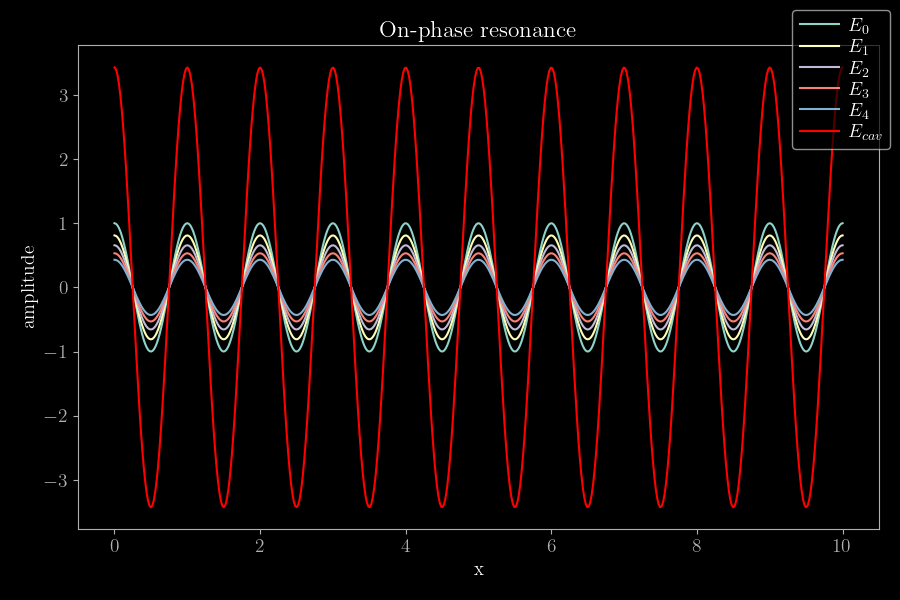

In [42]:
# plot on resonance
r1 = 0.9 # left mirror reflectivity
r2 = 0.9 # right mirror reflectivity
E_in = 1 # set the incident wave after transmission to have amp of 1
L = 10 # cavity length
wav = 1 # wavelength; set equal to integer multiple of L for on-resonance
k = 2*np.pi/wav # wave number
phasor = np.exp(-1j*2*k*L) # the reflection phasor

x = np.linspace(0, L, 500)
Ens = []
fig, ax = plt.subplots(1)
for n in range(5):
    En = (np.exp(1j*k*x))*E_in*(r1*r2*phasor)**n
    ax.plot(x, En, label=f'$E_{n}$')
    Ens.append(En)

# plot the total phasor
E_cav = np.sum(Ens, axis=0)
ax.plot(x, E_cav, color='red', label='$E_{cav}$')

# save the amp of on-phase case
max_amp = max(E_cav)
    
fig.legend()
ax.set_xlabel('x')
ax.set_ylabel('amplitude')
ax.set_title('On-phase resonance')

<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/var/folders/_r/9j158hjs4_1b8tq_l4bjwk340000gn/T/ipykernel_92668/4159812735.py:29: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(f'Off-phase resonance, $\phi$ = {phi_rt:.2f}')


Text(0.5, 1.0, 'Off-phase resonance, $\\phi$ = 0.38')

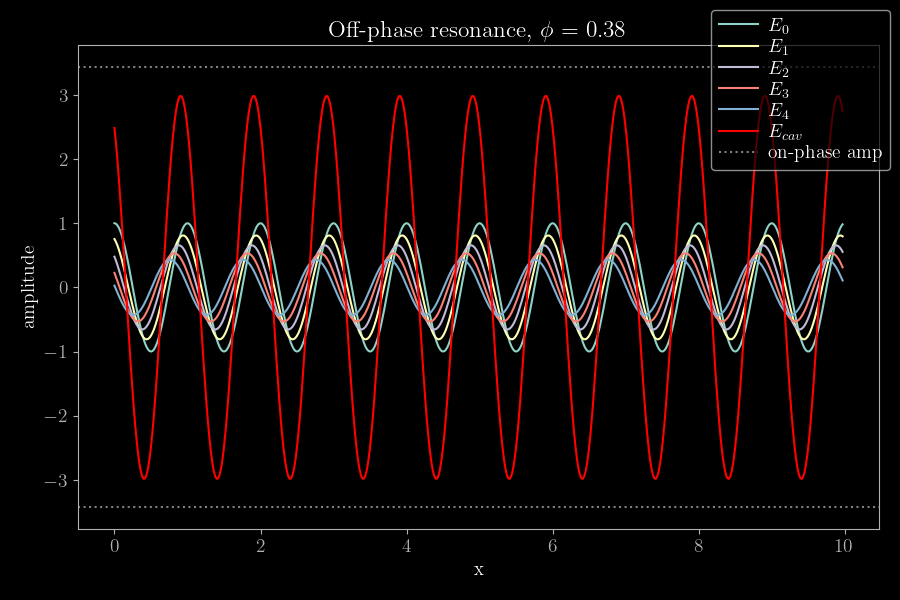

In [45]:
# plot off-resonance
L = 9.97
wav = 1
k = 2*np.pi/wav # wave number
phasor = np.exp(-1j*2*k*L) # the reflection phasor

x = np.linspace(0, L, 500)
Ens = []
fig, ax = plt.subplots(1)
for n in range(5):
    En = (np.exp(1j*k*x))*E_in*(r1*r2*phasor)**n
    ax.plot(x, En, label=f'$E_{n}$')
    Ens.append(En)

# plot the total phasor
E_cav = np.sum(Ens, axis=0)
ax.plot(x, E_cav, color='red', label='$E_{cav}$')

# add the max amp from above to show lower amplitude
ax.axhline(max_amp, linestyle=':', color='gray', label='on-phase amp')
ax.axhline(-max_amp, linestyle=':', color='gray')
    
fig.legend()
ax.set_xlabel('x')
ax.set_ylabel('amplitude')

# calculate phase offset
phi_rt = (-(2*k*L) % (2*np.pi)) # negative phase accrued due to short cavity
ax.set_title(f'Off-phase resonance, $\phi$ = {phi_rt:.2f}')

The plot above contains additional quantitative information relating to the phase: the actual phase offset 
$$\phi_{rt} = mod(-2kL, 2\pi)$$
and the maximum amplitude of the on-phase field. The latter shows that the amplitude of $E_{cav}$ is reduced when off-resonance.

## Part C:
The previous parts we've assumed there is zero delay in the propogation time: i.e that the fields in the cavity are in *steady state*.
Now let's relax this assumption.

**What will be the response of the Fabry-Perot intracavity field $E_\mathrm{cav}$ to a step input $E_\mathrm{in}$**?

For simplicity, assume that the input laser is exactly on resonance, such that $e^{i 2 k L} = 1$

1. What is the round-trip time delay time $\tau_{rt}$ of the cavity?
2. How much time $t$ must elapse for the $n$th term of $E_n$ to start contributing?  Write an expression for $n$ in terms of $t$ and $\tau_{rt}$.
3. Using a partial geometric series, what is the buildup for the cavity $E_\mathrm{cav}(n)$ after $n$ terms are summed together?
4. Using the model $1 - \exp(-t / \tau_\mathrm{storage})$, calculate the cavity storage time $\tau_\mathrm{storage}$.
5. Compare your result to the cavity pole $\nu_p$.

We'll assume $E_{in}$ has the form of a step function that turns on at some time $t_0$:
```{math}
E_in = \begin{cases}
0, &t < t_0 \\
|E_{in}|e^{i\omega t}, &t \geq t_0
\end{cases}
```
1. The time to travel a round trip of total distance $2L$ (i.e. $L$ both ways) is
$$\tau_{rt} = \frac{2L}{c},$$
where $c$ is the speed of light.
2. The $n$th round trip will be completed and contribute to the total cavity signal after a time $t = n\tau_{rt}$, or rewriting:
$$n = \frac{t}{\tau_{rt}}$$
3. The first $N$ terms of a geometric series can be written as
$$\sum_{j=0}^{N} ar^j = a \bigg( \frac{1 - r^{N+1}}{1 - r} \bigg).$$
From part B, at some time $t = t_0 + n\tau_{rt}$, the total signal in the cavity assuming complete resonance is
$$E_{cav}(n) = \sum_{j=0}^{n} t_1E_{in}(r_1r_2)^j$$
which, using the above identity, can be rewritten as
$$E_{cav}(n) = t_1E_{in} \bigg( \frac{1 - (r_1r_2)^{n+1}}{1 - r_1r_2} \bigg).$$
4. From above, we know $E_{cav}$ will tend towards
$$E_{cav}(n \rightarrow \infty) = t_1E_{in} \bigg( \frac{1}{1 - r_1r_2} \bigg).$$
We can calculate the ratio of $E_{cav}$ with the first $n$ terms to the maximum limit:
\begin{align}
\frac{E_{cav}(n)}{E_{cav}(\infty)} &= 1 - (r_1r_2)^{n + 1} \\
&= 1 - (r_1r_2)^{ct/2L + 1}.
\end{align}
To calculate $\tau_{storage}$, we'll assume the cavity field grows exponentially and asymptotes to the maximum:
$$\frac{E_{cav}(n)}{E_{cav}(\infty)} = 1 - e^{-t/\tau_{storage}}.$$
We can set $t = \tau_{storage}$ to get
\begin{align}
1 - (r_1r_2)^{c\tau_{storage}/2L + 1} &= 1 - e^{-1} \\
(r_1r_2)^{c\tau_{storage}/2L + 1} &= \frac{1}{e} \\
\bigg( \frac{c\tau_{storage}}{2L} + 1 \bigg) \log (r_1r_2) &= -1 \\
\frac{c\tau_{storage}}{2L} + 1 &= \frac{1}{\log (r_1r_2)} \\
\tau_{storage} &= -\frac{2L}{c} \bigg( \frac{1}{\log (r_1r_2)} + 1 \bigg) \\
\tau_{storage} &= \frac{2L}{c} \bigg( \frac{1}{\log (1/r_1r_2)} - 1 \bigg).
\end{align}
5) Comparing to the steady-state solution for the pole in the class notes:
$$|\nu_p| = {2\pi}\frac{c}{2L} \log (1/r_1r_2).$$
The associated storage time is
\begin{align}
\tau_{storage} &= \frac{1}{|\nu_p|} \\
&= 2\pi \frac{2L}{c} \frac{1}{\log (1/r_1r_2)}.
\end{align}
The result obtained above matches the steady-state limit barring a factor of $2\pi$ and one crossing time $2L/c$.

# Finesse and Loss in a Fabry-Perot
A very convenient relationship between total loss in a cavity $\mathcal{L}_\mathrm{total}$ 
and cavity finesse $\mathcal{F}$ can be calculated to be (in the high-finesse limit $\mathcal{F} \gg 1$):
\begin{align}
\mathcal{F} = \dfrac{2 \pi}{\mathcal{L}_\mathrm{total}}
\end{align}

Derive this result starting with $\mathcal{F} = \dfrac{\mathrm{FSR}}{\nu_\mathrm{FWHM}}$.

*Hint 1:* Total loss includes transmission losses for both mirrors: $\mathcal{L}_\mathrm{total} = T_1 + T_2 + \mathcal{L}_1 + \mathcal{L}_2$.

*Hint 2:* Write $r = \sqrt{1 - T - \mathcal{L}}$.

*Hint 3:* Use the binomial approximation.

*Hint 4:* This paper from MIT may be helpful: [*Loss in long-storage-time optical cavities*](https://arxiv.org/abs/1310.1820)

Start with the definitions of $\text{FSR}$ and $\nu_{\text{FWHM}}$:
$$\text{FSR} = \frac{c}{2L},$$
$$\nu_{\text{FWHM}} = \frac{c}{L\pi} \arcsin \bigg( \frac{1 - r_1r_2}{2\sqrt{r_1r_2}} \bigg).$$
The finesse can then be written as
$$\mathcal{F} = \frac{\pi}{2}\bigg[ \arcsin \bigg( \frac{1 - r_1r_2}{2\sqrt{r_1r_2}} \bigg) \bigg]^{-1}.$$
We can write the reflectivity coefficients $r_i$ in terms of the transmission $T_i$ and loss $\mathcal{L}_i$ at each mirror as above. The product $r_1r_2$ can be rewritten as
\begin{align}
r_1r_2 &= \sqrt{(1 - T_1 - \mathcal{L}_1)(1 - T_2 - \mathcal{L}_2)} \\
&= \sqrt{1 + (T_1 + \mathcal{L}_1)(T_2 + \mathcal{L}_2) - (T_1 + T_2 + \mathcal{L}_1 + \mathcal{L}_2)} \\
&= \sqrt{1 - \mathcal{L}_{total} + (T_1 + \mathcal{L}_1)(T_2 + \mathcal{L}_2)},
\end{align}
where in the last step we substitute $\mathcal{L}_{total} = T_1 + T_2 + \mathcal{L}_1 + \mathcal{L}_2$. To simplify this, we can assume a high-finesse cavity such that the total loss $\mathcal{L}_{total} << 1$. Thus, by the binomial approximation and omitting the second-order term,
\begin{align}
(\sqrt{r_1r_2})^{\pm 1} &= (1 - \mathcal{L}_{total} + \mathcal{O}(\mathcal{L}^2_{total}))^{\pm 1/4} \\
&\approx 1 \mp \frac{1}{4}\mathcal{L}_{total}.
\end{align}
We can use this to rewrite the argument to the arcsin factor above:
\begin{align}
\frac{1 - r_1r_2}{2\sqrt{r_1r_2}} &= \frac{1}{2\sqrt{r_1r_2}} - \frac{\sqrt{r_1r_2}}{2} \\
&\approx \frac{1}{2} \bigg[ 1 + \frac{1}{4}\mathcal{L}_{total} - 1 + \frac{1}{4}\mathcal{L}_{total} \bigg] \\
&\approx \frac{1}{4} \mathcal{L}_{total}.
\end{align}
Thus,
$$\mathcal{F} \approx \frac{\pi}{2} \bigg[ \arcsin \bigg( \frac{1}{4} \mathcal{L}_{total} \bigg) \bigg]^{-1}.$$
We can simplify this one more time under the small $\mathcal{L}_{total}$ approximation by using the first-order Taylor series $\arcsin x \approx x$, which yields
\begin{align}
\mathcal{F} &\approx \frac{\pi}{2} \bigg( \frac{1}{4} \mathcal{L}_{total} \bigg)^{-1} \\
\mathcal{F} &\approx \frac{2\pi}{\mathcal{L}_{total}}.
\end{align}

# Finesse and Gain in a Fabry-Perot

## Part A:
Assuming that we have a *critically-coupled* Fabry-Perot cavity,\
what is the comparison between the finesse $\mathcal{F}$ and power gain $G_\mathrm{cav}$?

For both cases, assume that the cavity is on-resonance. The finesse and power gain can be expressed as
\begin{align}
\mathcal{F} &= \frac{\pi}{2}\bigg[ \arcsin \bigg( \frac{1 - r_1r_2}{2\sqrt{r_1r_2}} \bigg) \bigg]^{-1}, \\
G_{cav} &= \frac{T_1}{1 + R_1R_2 - 2r_1r_2}.
\end{align}
In the critically-coupled case, $r_1 = r_2$, which gives a finesse of
\begin{align}
\mathcal{F} &= \frac{\pi}{2}\bigg[ \arcsin \bigg( \frac{1 - r_1^2}{2\sqrt{r_1^2}} \bigg) \bigg]^{-1} \\
&= \frac{\pi}{2}\bigg[ \arcsin \bigg( \frac{1 - R_1}{2\sqrt{R_1}} \bigg) \bigg]^{-1} \\
&\approx \pi \frac{\sqrt{R_1}}{1-R_1}
\end{align}
and a power gain of
\begin{align}
G_{cav} &= \frac{T_1}{1 + R_1^2 - 2r_1^2} \\
&= \frac{1 - R_1}{(1 - R_1)^2} \\
&= \frac{1}{1 - R_1}.
\end{align}
Here, we assume a high finesse, no-loss cavity where $T_1 = 1 - R_1 << 1$. Substituting $G_{cav}$ into $\mathcal{F}$ gives
$$\mathcal{F} \approx \pi G_{cav} \sqrt{R_1}.$$
In the highly reflective limit $R_1 \rightarrow 1$, this tends toward $\pi G_{cav}$.

## Part B:
Repeat Part A above for an *over-coupled* cavity such that $r_2 \approx 1$.\
Does the relationship change?

In the over-coupled limit setting $r_2 = 1$ we obtain a finesse of 
\begin{align}
\mathcal{F} &= \frac{\pi}{2}\bigg[ \arcsin \bigg( \frac{1 - r_1}{2\sqrt{r_1}} \bigg) \bigg]^{-1} \\
&\approx \frac{\pi}{2} \bigg( \frac{2\sqrt{r_1}}{1 - r_1} \bigg)^{-1} \\
&\approx \pi \frac{\sqrt{r_1}}{1-r_1}
\end{align}
and a power gain of
\begin{align}
G_{cav} &= \frac{T_1}{1 + R_1^2 - 2r_1} \\
&= \frac{1 - r_1^2}{(1 - r_1)^2} \\
&= \frac{1 + r_1}{1 - r_1},
\end{align}
again using the high-finesse, no-loss assumptions as above. Substituting in $G_{cav}$ gives
$$\mathcal{F} \approx \pi G_{cav} \frac{\sqrt{r_1}}{1 + r_1}.$$
In the highly reflective limit $\mathcal{F} \rightarrow \pi G_{cav}/2$. The proportionality of the finesse to the gain is twice as much in the critically-coupled case as in the over-coupled case.

# Reflection Phase Angle vs Frequency

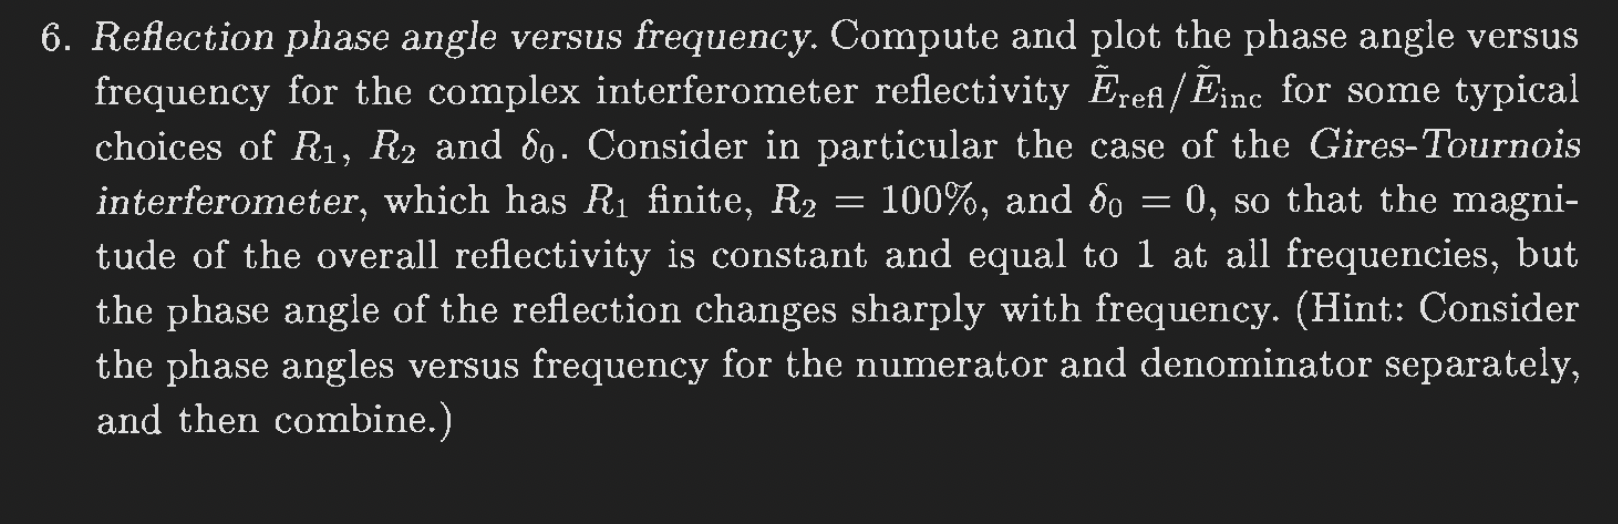

## Plots
Make Bode plots of the reflection phase vs round-trip phase where $\phi$ serves as the x-axis.\
*Hint:* This is similar to our expressions $\theta(\phi)$, where $\theta$ is the reflection phase, and $\phi$ is the round-trip phase.

From lecture, the reflected wave relative to the incident wave is
$$\frac{E_{refl}}{E_{in}} = \frac{r_1 - r_2(r_1^2 + t_1^2)e^{-2ikL}}{1 - r_1r_2e^{-2ikL}}.$$
The coefficients $r_i, t_i$, and $\ell_i$ (which determine the reflectivity, transmission, and loss of mirror $i$ respectively) are related by
$$r_i^2 + t_i^2 + \ell_i^2 = R + T + \mathcal{L} = 1.$$
Both the numerator and denominator are complex numbers that can be decomposed into an amplitude and phasor
$$z = ae^{i\phi},$$
where
$$\phi = \arctan2 \bigg( \frac{Im \{ z \}}{Re \{ z \}} \bigg).$$
For the numerator:
$$r_1 - r_2(r_1^2 + t_1^2)e^{-2ikL} = \alpha e^{i\psi}$$
$$\psi &= \arctan2 \bigg( \frac{r_2 (r_1^2 + t_1^2) \sin 2kL}{r_1 - r_2 (r_1^2 + t_1^2) \cos 2kL} \bigg).$$
For the denominator:
$$1 - r_1r_2e^{-2ikL} = \beta e^{i\iota}$$
$$\iota &= \arctan2 \bigg( \frac{r_1r_2 \sin 2kL}{1 - r_1r_2 \cos 2kL} \bigg).$$
The phase of the full expression can be calculated from the quotient of these two quantities:
\begin{align}
ae^{i\phi} &= \frac{\alpha e^{i\psi}}{\beta e^{i\iota}} \\
&= \frac{\alpha}{\beta}e^{i(\psi - \iota)}.
\end{align}
Thus,
\begin{align}
\theta &= \psi - \iota \\
\theta &= \arctan2 \bigg( \frac{r_2 (r_1^2 + t_1^2) \sin 2kL}{r_1 - r_2 (r_1^2 + t_1^2) \cos 2kL} \bigg) - \arctan2 \bigg( \frac{r_1r_2 \sin 2kL}{1 - r_1r_2 \cos 2kL} \bigg).
\end{align}
For the special case of a Gires-Tournois cavity, we assume lossless mirrors $\ell_1 = \ell_2 = 0$ and $r_2 = 1$, for which the above expression reduces to
$$\theta = \arctan2 \bigg(\frac{\sin 2kL}{r_1 - \cos 2kL} \bigg) - \arctan2 \bigg( \frac{r_1 \sin 2kL}{1 - r_1 \cos 2kL} \bigg).$$
In this limit, the amplitude becomes
\begin{align}
\bigg| \frac{E_{refl}}{E_{in}} \bigg|^2 &= \bigg| \frac{r_1 - e^{-2ikL}}{1 - r_1e^{-2ikL}} \bigg|^2 \\
&= \frac{r_1^2 + 1 - 2r_1 \cos 2kL}{r_1^2 + 1 - 2r_1 \cos 2kL} = 1
\end{align}
(as expected, since this basically describes a mirror passing through a semi-permeable membrane).

Below are plotted three cases: the Gires-Tournois cavity ($r_2 = 1, \ell_i = 0$), a lossless LIGO-like cavity ($r_1 = 0.98, r_2 = 0.99$), and a lossy cavity ($r_1 = r_2 = 0.75, \ell_1 = \ell_2 = 0.1$).

In [154]:
def refl(phi, r1, r2 = 1, l1 = 0, l2 = 0):
    '''The raw expression for the reflected beam.
    The amplitude and phase can be extracted using abs() and np.angle() respectively.
    '''
    t1 = np.sqrt(1 - r1*r1 - l1*l1)
    t2 = np.sqrt(1 - r2*r2 - l2*l2)
    num = r1 - r2*(r1*r1 + t1*t1)*np.exp(-1j*phi)
    den = 1 - r1*r2*np.exp(-1j*phi)
    return num/den

In [155]:
def refl_angle(phi, r1, r2 = 1, l1 = 0, l2 = 0):
    '''The angle calculated above.
    '''
    t1 = np.sqrt(1 - r1*r1 - l1*l1)
    t2 = np.sqrt(1 - r2*r2 - l2*l2)
    x1, x2 = (r2*(r1*r1+t1*t1)*np.sin(phi), (r1 - r2*(r1*r1+t1*t1)*np.cos(phi)))
    y1, y2 = (r1*r2*np.sin(phi), (1 - r1*r2*np.cos(phi)))
    return np.arctan2(x1, x2) - np.arctan2(y1, y2)

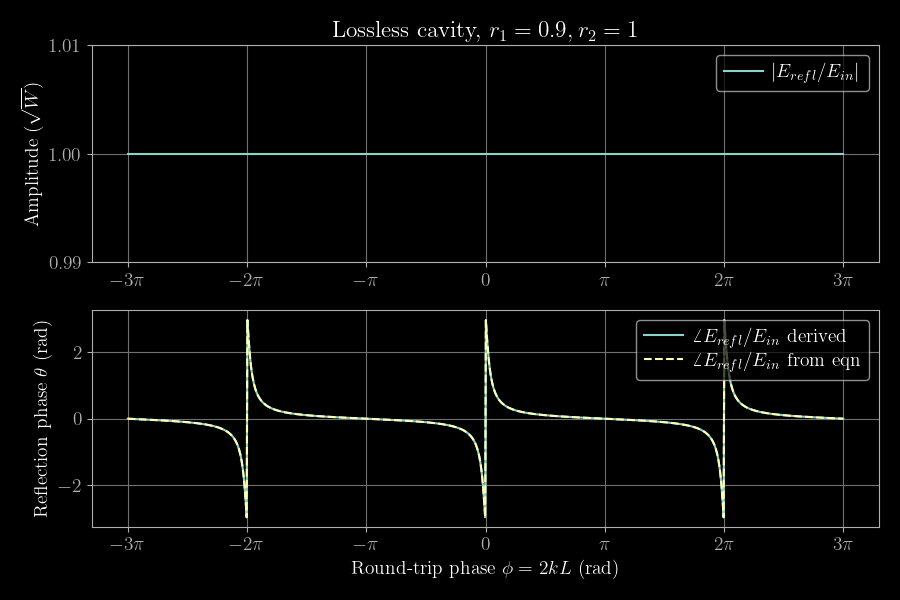

In [170]:
# Gires-Tournois case
phis = np.linspace(-3*np.pi, 3*np.pi, 1000)
refls = refl(phis, 0.9)
refl_angs = refl_angle(phis, 0.9)

x_vals = [-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi]
x_names = [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
y_vals = [0.99, 1, 1.01]

fig, ax = plt.subplots(2)
ax[0].plot(phis, abs(refls), label=r'$|E_{refl}/E_{in}|$')
ax[1].plot(phis, refl_angs, label=r'$\angle E_{refl}/E_{in}$ derived')
ax[1].plot(phis, np.arctan2(np.imag(refls), np.real(refls)), linestyle='--', label=r'$\angle E_{refl}/E_{in}$ from eqn')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel(r'Amplitude ($\sqrt{W}$)')
ax[1].set_xlabel(r'Round-trip phase $\phi = 2kL$ (rad)')
ax[1].set_ylabel(r'Reflection phase $\theta$ (rad)')
ax[0].set_title('Lossless cavity, $r_1 = 0.9, r_2 = 1$')
ax[0].set_xticks(x_vals, x_names)
ax[0].set_yticks(y_vals)
ax[1].set_xticks(x_vals, x_names)
ax[0].grid()
ax[1].grid()

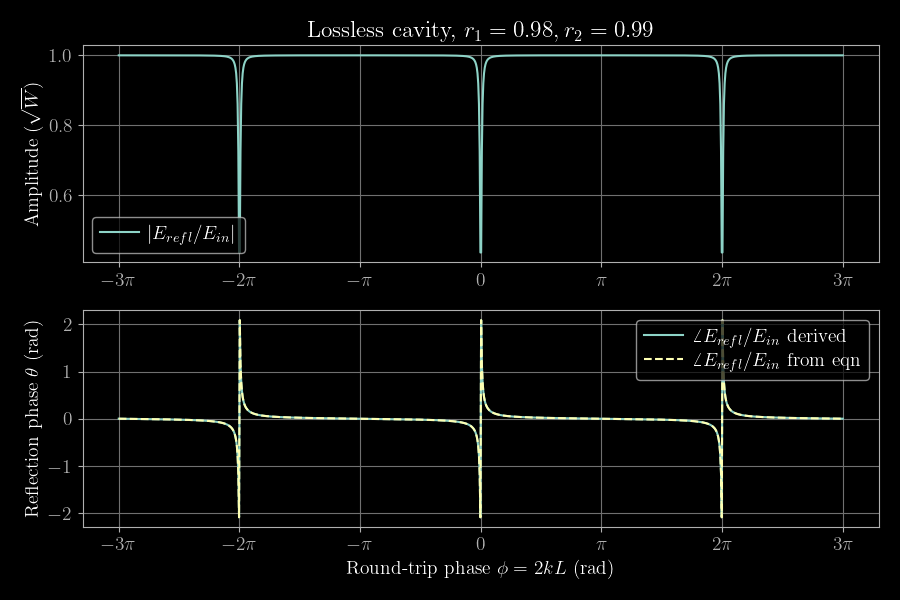

In [171]:
# LIGO-ish cavity
phis = np.linspace(-3*np.pi, 3*np.pi, 1000)
refls = refl(phis, 0.98, r2=0.99)
refl_angs = refl_angle(phis, 0.98, r2=0.99)

fig, ax = plt.subplots(2)
ax[0].plot(phis, abs(refls), label=r'$|E_{refl}/E_{in}|$')
ax[1].plot(phis, refl_angs, label=r'$\angle E_{refl}/E_{in}$ derived')
ax[1].plot(phis, np.arctan2(np.imag(refls), np.real(refls)), linestyle='--', label=r'$\angle E_{refl}/E_{in}$ from eqn')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel(r'Amplitude ($\sqrt{W}$)')
ax[1].set_xlabel(r'Round-trip phase $\phi = 2kL$ (rad)')
ax[1].set_ylabel(r'Reflection phase $\theta$ (rad)')
ax[0].set_title('Lossless cavity, $r_1 = 0.98, r_2 = 0.99$')
ax[0].set_xticks(x_vals, x_names)
ax[1].set_xticks(x_vals, x_names)
ax[0].grid()
ax[1].grid()

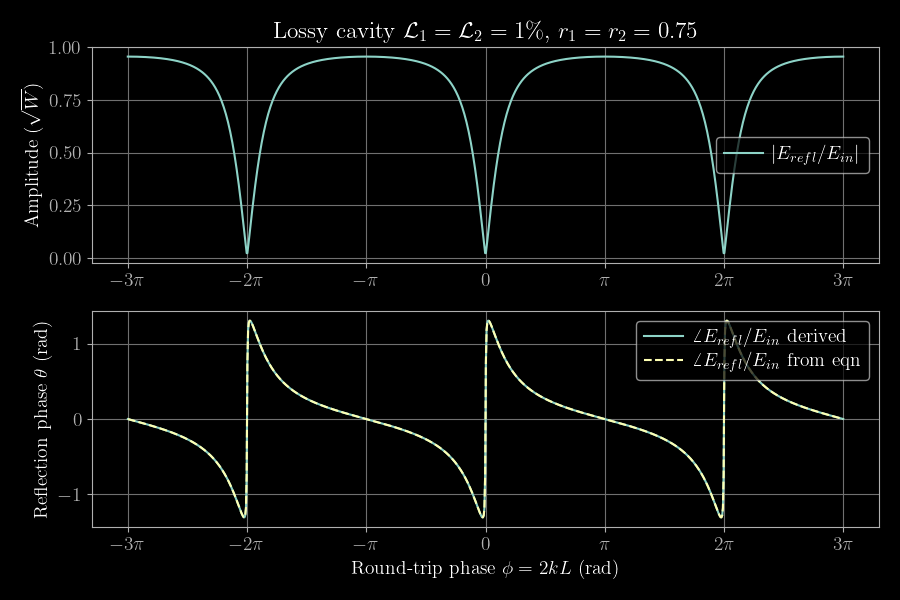

In [172]:
# Lossy cavity
phis = np.linspace(-3*np.pi, 3*np.pi, 1000)
refls = refl(phis, 0.75, r2=0.75, l1=0.1, l2=0.1)
refl_angs = refl_angle(phis, 0.75, r2=0.75, l1=0.1, l2=0.1)

fig, ax = plt.subplots(2)
ax[0].plot(phis, abs(refls), label=r'$|E_{refl}/E_{in}|$')
ax[1].plot(phis, refl_angs, label=r'$\angle E_{refl}/E_{in}$ derived')
ax[1].plot(phis, np.arctan2(np.imag(refls), np.real(refls)), linestyle='--', label=r'$\angle E_{refl}/E_{in}$ from eqn')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel(r'Amplitude ($\sqrt{W}$)')
ax[1].set_xlabel(r'Round-trip phase $\phi = 2kL$ (rad)')
ax[1].set_ylabel(r'Reflection phase $\theta$ (rad)')
ax[0].set_title(r'Lossy cavity $\mathcal{L}_1 = \mathcal{L}_2 = 1\%$, $r_1 = r_2 = 0.75$')
ax[0].set_xticks(x_vals, x_names)
ax[1].set_xticks(x_vals, x_names)
ax[0].grid()
ax[1].grid()

# Cavity Measurement and Modeling (Extra Credit)

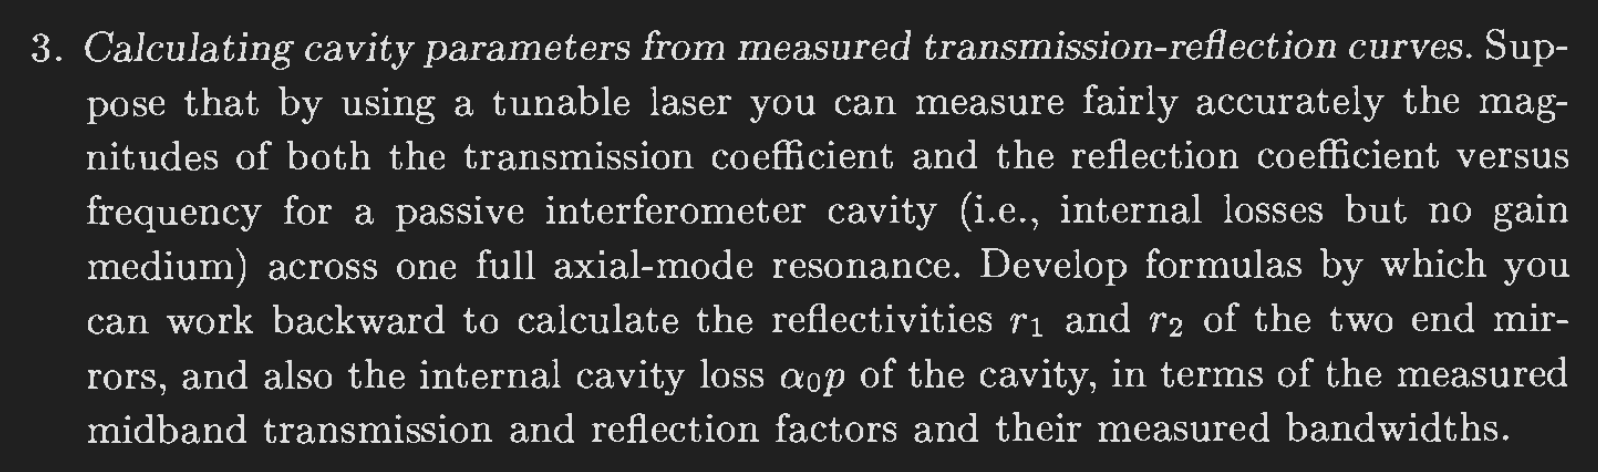

# Laser Inertial Confinement Fusion (Extra Credit)

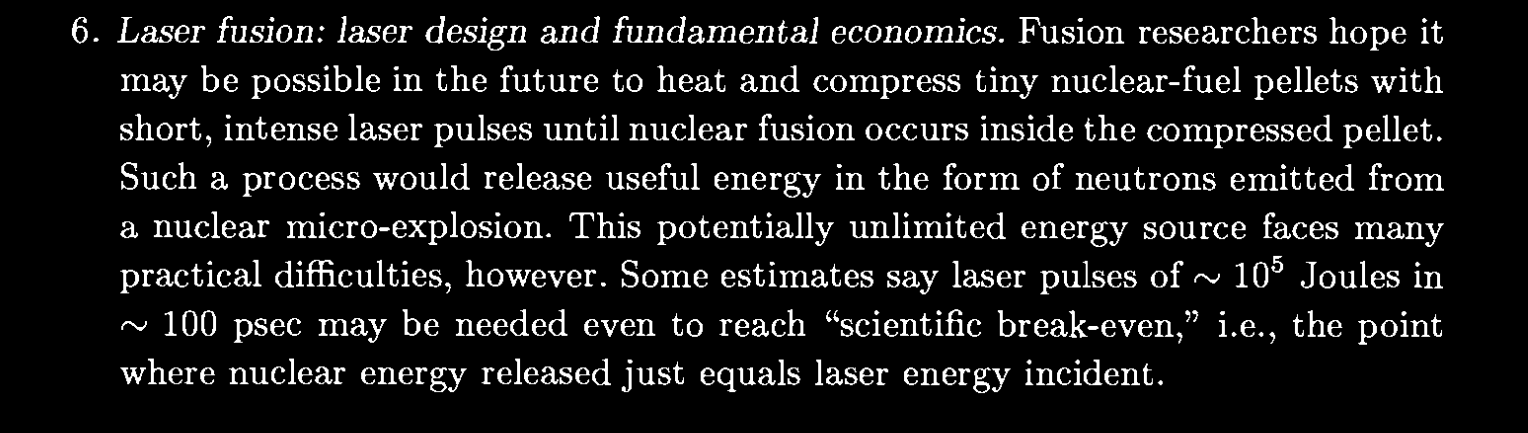

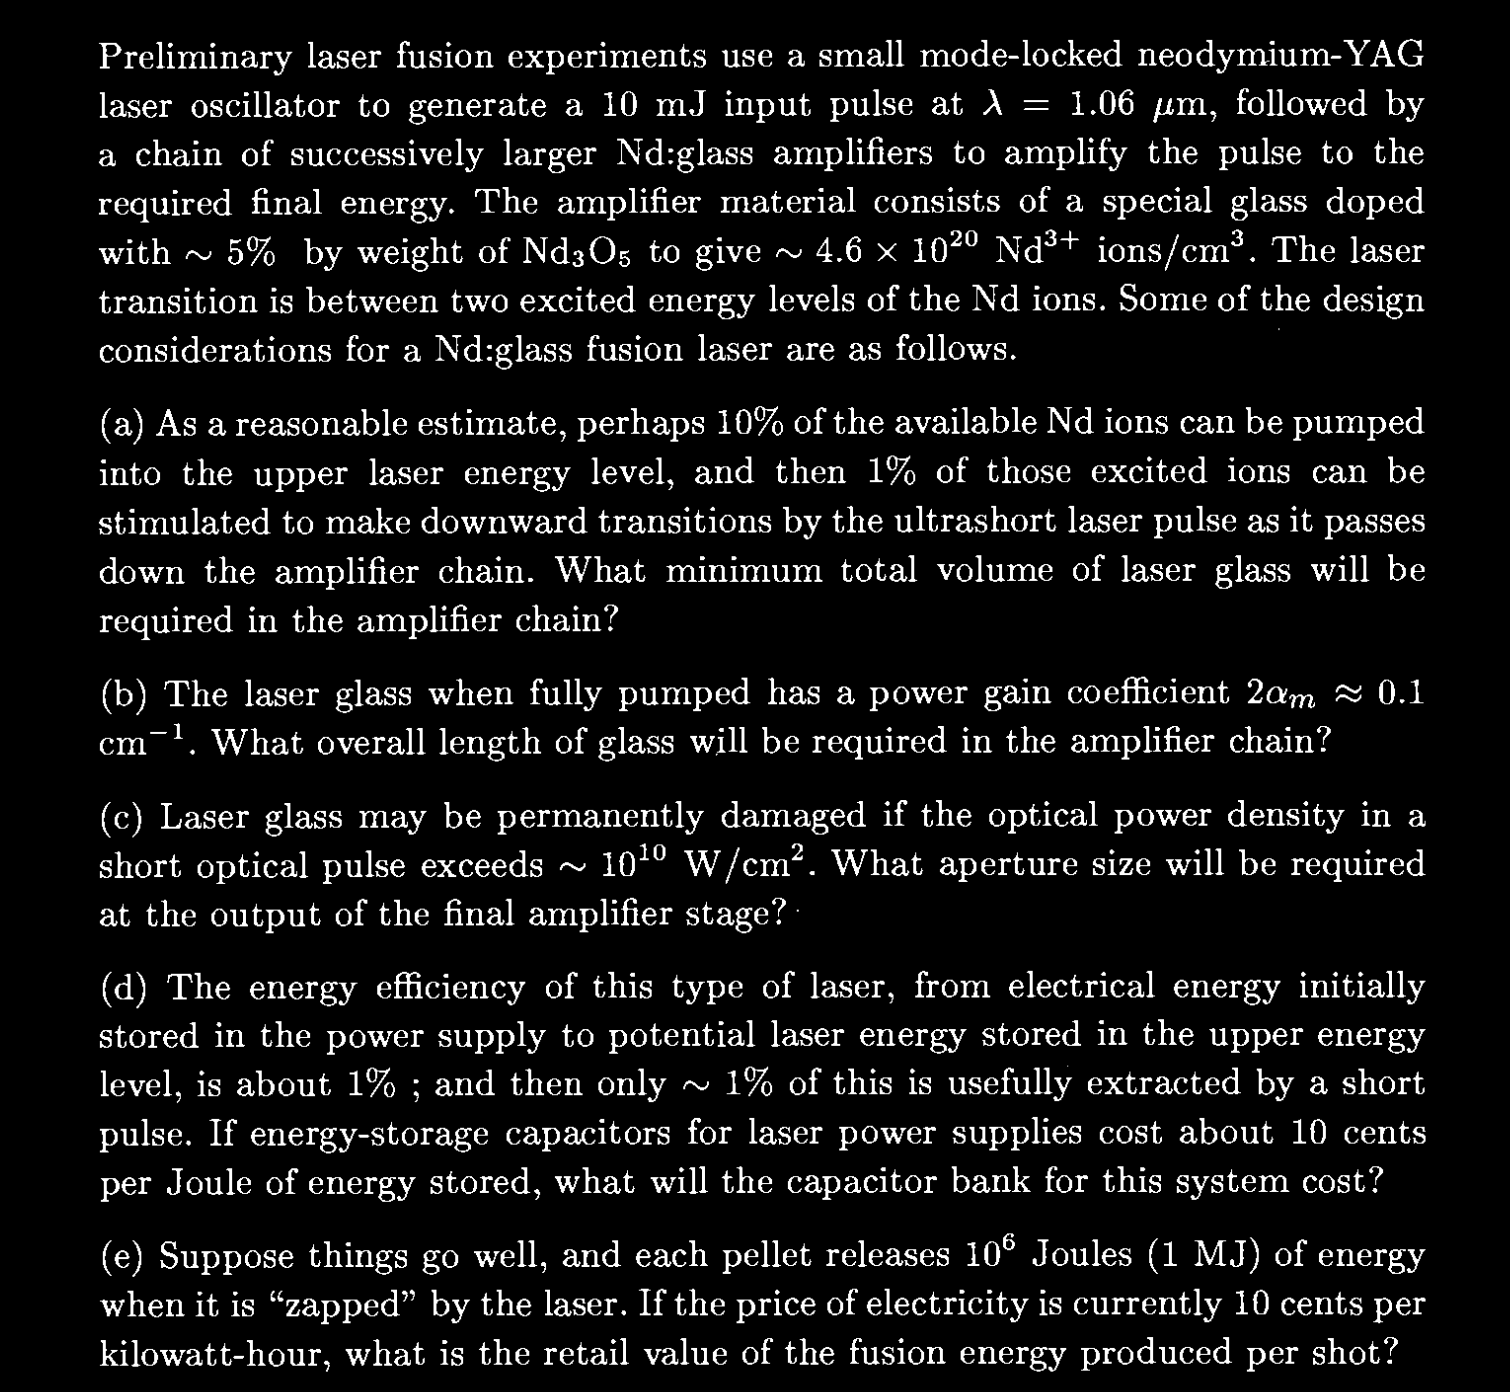

a) The energy of the photon released by each ion is
$$E_{\gamma} = hf = \frac{hc}{\lambda}.$$
We are given that $\lambda = 1.06 \times 10^{-6}$ m, which gives a per-ion energy of
$$E_{\gamma} \approx 1.88 \times 10^{-19}~J.$$

In [185]:
# energy per photon
h = 6.626e-34
c = 3e8
lam = 1.06e-6
Ey = h*c/lam
Ey

1.8752830188679245e-19

The total laser output energy is $E_{tot} = 10^5~J$. The minimum number of ions required to reach this value is
$$N = \frac{E_{tot}}{E_{\gamma}} \approx 5.3\times10^{23}.$$

In [175]:
# number of ions to achieve total laser energy
Etot = 1e5
N = Etot/Ey
N

5.332528423382634e+23

In a real laser, only $10\%$ of ions are excited to the upper lasing state, and $1\%$ of the excited ions emit during lasing. Thus, $1000N = 5.3 \times 10^{26}$ ions are required in the real laser to achieve the desired energy. With a number density of $\rho = 4.6\times10^{20}$ ions per cubic centimeter, the total volume taken up by the lasing medium is
$$V = \frac{1000N}{\rho} \approx 1.16 \times 10^6~\text{cm}^{-3}.$$

In [176]:
# volume
rho = 4.6e20
V = (N*1000)/rho # 0.1% of total ions excite and emit
V

1159245.3094310074

b) The amplitude gain formula given in Siegman is
$$G(\omega) = \frac{I(L)}{I(0)} = e^{2\alpha_m L - 2\alpha_0 L}.$$
If we assume a lossless cavity $\alpha_0 \rightarrow 0$ and that the input and output emit energy over the same area at the same rate, then $G = \exp(2\alpha_m L)$ describes the gain in laser energy from the start to the end of the cavity. Rewriting in terms of $L$:
$$L = \frac{\log G}{2\alpha_m}.$$
We are given that $2\alpha_m = 0.1$. Given the input laser has a total energy of $10~\text{mJ} = 10^{-2}~\text{J}$ and the output laser has a total energy of $10^5~\text{J}$, the total gain across the cavity is $G = 10^7$. Thus, the length of the cavity must be
$$L \approx 161~\text{cm} = 1.61~\text{m}.$$

In [186]:
# length of cavity
power_gain = 0.1
G = 1e5 / 1e-2 # ratio of output to input power (assuming same incident area/rate)
L = np.log(G) / power_gain
L

np.float64(161.18095650958318)

c) The maximum power the output laser can have is $10^{10}~\text{W/cm}^2$. A laser emitting $10^5~\text{J}$ over $100~\text{ps} = 10^{-10}~\text{s}$ will have a power output of $10^{15}~\text{W}$. Thus, the output aperture must have a total area of
$$\frac{\text{Output power}}{\text{Max output power rate}} = 10^{5}~\text{cm}.$$

In [179]:
# size of aperture
max_power_den = 1e10
tau = 100e-12
out_power = Etot / tau
max_area = out_power/max_power_den
max_area

100000.0

For reference, if the aperture is a circle, the corresponding radius would have to be $r \approx 178~\text{cm}$, or a little longer than the length of the cavity to achieve the desired power gain.

In [180]:
# circular aperture radius
np.sqrt(max_area/np.pi)

np.float64(178.4124116152771)

d) Typical energy storage has $1\%$ efficiency, and $1\%$ of stored energy is released during a pulse, meaning $10^4$ times more energy must be stored to accommodate the laser. For a $10^5~\text{J}$ laser, that means $10^9~\text{J}$ must be generated and stored. At $\$0.10$ per joule, the cost to store the energy for one laser pulse is $\$100~\text{million}.$

In [183]:
# cost of stored energy
storage = Etot * 1e4 # laser energy is (1%)(1%) = 0.01% of total energy stored
storage_cost = storage * 0.1
print(f'{storage_cost:.2e}')

1.00e+08


e) One kilowatt-hour of energy indicates $1000~\text{J}$ released per second for 1 hour. In total, this is $3.6\times10^6~\text{J}$. If $1~\text{kWh}$ goes for $\$0.10$, the retail value of one laser pulse that generates $10^6~\text{J}$ of electricity is $\sim\$0.03$.

In [184]:
# retail cost of energy
pulse_out = 1e6
kwh = 1000 * 3600 # 1000 joules per second for 3600 seconds (1 hour) = 1 kWh
retail = pulse_out / kwh * 0.1
retail

0.02777777777777778

# Heating Effects (Extra Credit)

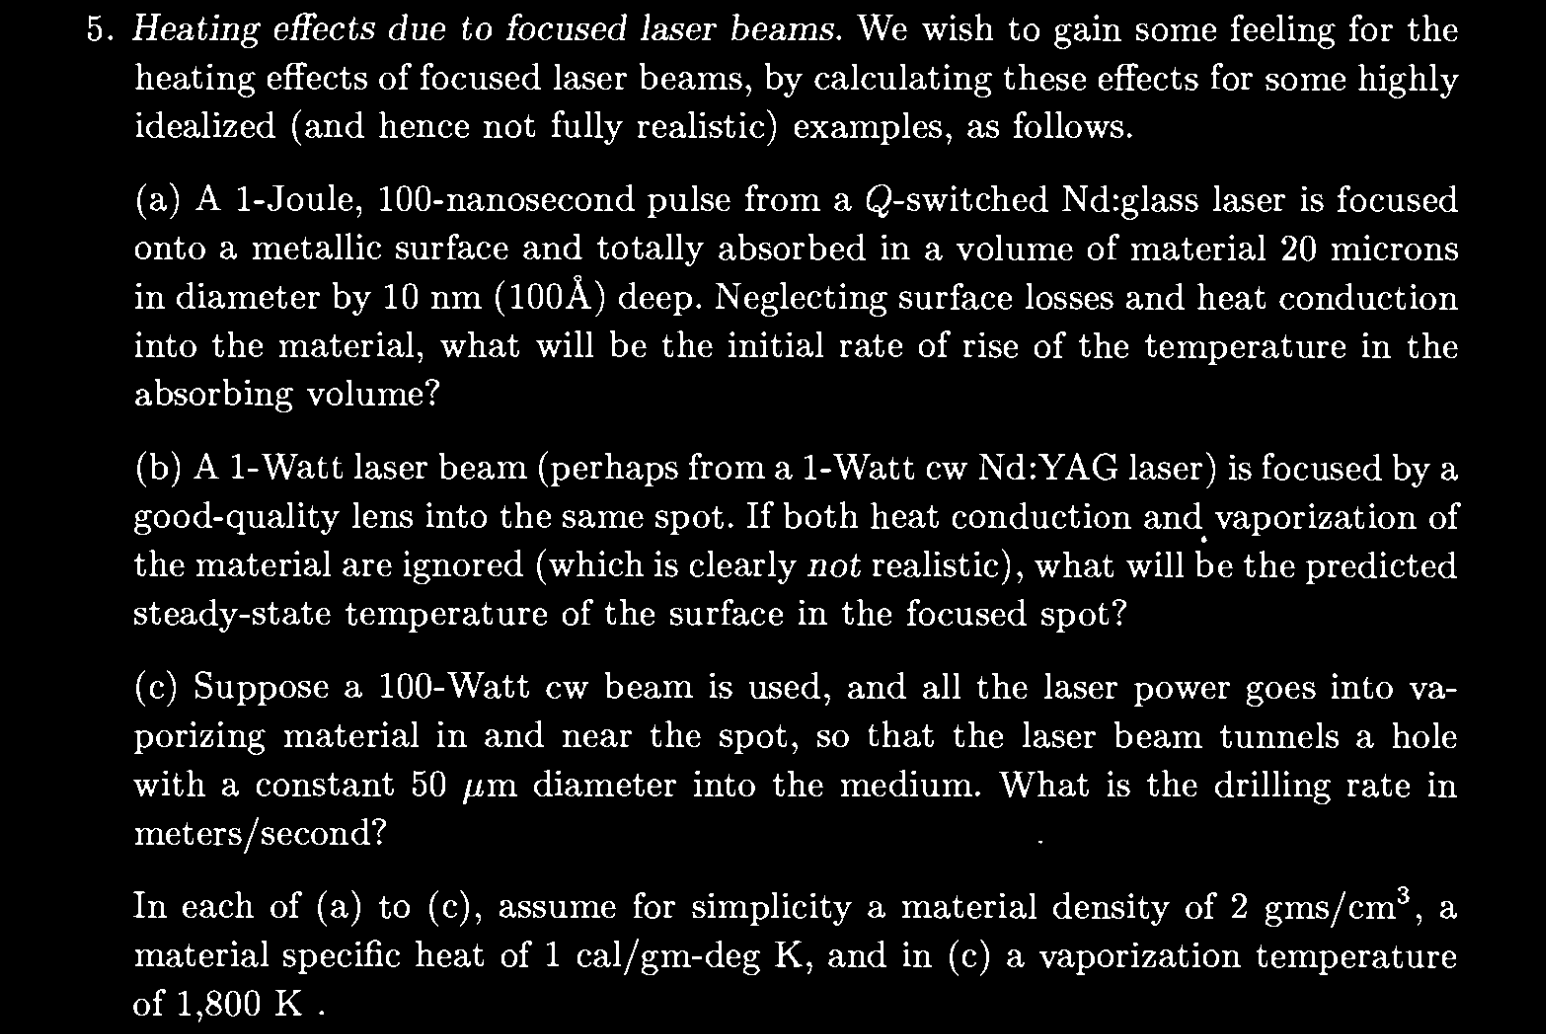

In [187]:
r = 1e-5*100 # m to cm
l = 1e-8*100
V = np.pi*r*r*l

rho = 2
m = rho*V
m

6.283185307179586e-12

In [189]:
q = 4.184
T = 1/q/m

dt = 100e-9
T/dt

3.8038944333626995e+17